In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
data = pd.read_csv('Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
res = data['Research'].value_counts()
res

Research
1    219
0    181
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1de77347690>,
 [Text(-1.087775141269343, -0.16353972617214774, '1'),
  Text(1.087775141269343, 0.16353972617214763, '0')])

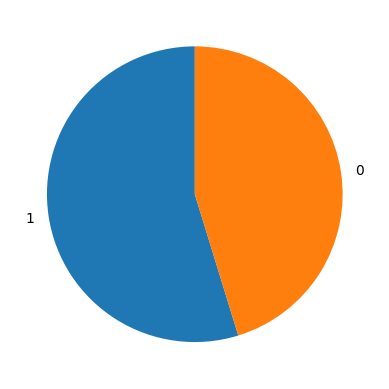

In [8]:
plt.pie(res,labels=res.index,startangle=90)

In [11]:
data = data.drop('Serial No.',axis=1)

In [12]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
x = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

In [15]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred1 = reg.predict(x_test)
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test, y_pred1)
score

0.8212082591486992

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR

In [33]:
knn = KNeighborsClassifier()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
svm = SVR()

In [35]:


rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
svm.fit(x_train,y_train)


SVR()

ValueError: Unknown label type: 'continuous'

In [37]:
y_pred4 = rf.predict(x_test)
y_pred4

array([0.6685, 0.7201, 0.9398, 0.8187, 0.5818, 0.9159, 0.5763, 0.4814,
       0.6816, 0.902 , 0.7308, 0.9392, 0.5343, 0.9039, 0.7252, 0.6687,
       0.6954, 0.4809, 0.7216, 0.9599, 0.6123, 0.6726, 0.7001, 0.5497,
       0.9424, 0.8025, 0.7393, 0.5716, 0.7224, 0.8049, 0.8075, 0.9425,
       0.6318, 0.4683, 0.7055, 0.6739, 0.6923, 0.7017, 0.6305, 0.9234,
       0.7476, 0.6313, 0.7725, 0.9472, 0.8654, 0.8443, 0.9648, 0.6666,
       0.9287, 0.8864, 0.9085, 0.7113, 0.7544, 0.9427, 0.5785, 0.5783,
       0.6917, 0.8423, 0.5806, 0.8728, 0.6392, 0.6309, 0.7038, 0.4587,
       0.6664, 0.6397, 0.6093, 0.8531, 0.8833, 0.7624, 0.6903, 0.8186,
       0.9211, 0.8612, 0.5285, 0.7425, 0.6843, 0.5497, 0.8412, 0.7648])

In [38]:
r2_score(y_test,y_pred2)

0.8043100511588648

In [39]:
y_pred3 = dt.predict(x_test)
y_pred3

array([0.62, 0.73, 0.94, 0.81, 0.34, 0.91, 0.59, 0.38, 0.65, 0.91, 0.79,
       0.94, 0.49, 0.91, 0.76, 0.75, 0.71, 0.44, 0.67, 0.97, 0.62, 0.67,
       0.66, 0.56, 0.95, 0.68, 0.71, 0.67, 0.69, 0.78, 0.78, 0.94, 0.48,
       0.44, 0.72, 0.67, 0.71, 0.73, 0.71, 0.93, 0.76, 0.65, 0.78, 0.94,
       0.88, 0.84, 0.97, 0.64, 0.94, 0.88, 0.93, 0.72, 0.8 , 0.95, 0.49,
       0.69, 0.7 , 0.83, 0.34, 0.88, 0.61, 0.61, 0.63, 0.47, 0.73, 0.52,
       0.64, 0.89, 0.88, 0.85, 0.75, 0.84, 0.93, 0.9 , 0.52, 0.76, 0.75,
       0.56, 0.87, 0.85])

In [40]:
r2_score(y_test,y_pred3)

0.6535597917341069

In [41]:
y_pred4 = svm.predict(x_test)
y_pred4

array([0.61103708, 0.6601993 , 0.876305  , 0.76604843, 0.57916474,
       0.88128068, 0.55053862, 0.59796124, 0.67298853, 0.77319585,
       0.75099629, 0.8494421 , 0.68408473, 0.75886829, 0.66206721,
       0.6873742 , 0.64394241, 0.55073146, 0.71965445, 0.86290395,
       0.58634547, 0.68677548, 0.71296743, 0.56120612, 0.87594396,
       0.7588349 , 0.67074409, 0.55843494, 0.64424812, 0.78534103,
       0.76615404, 0.871981  , 0.67260618, 0.57013592, 0.6826835 ,
       0.59146065, 0.74210294, 0.65704704, 0.64310985, 0.84446909,
       0.71620397, 0.71202383, 0.79032139, 0.90197221, 0.74838427,
       0.76882656, 0.87747383, 0.64229421, 0.81930568, 0.7758099 ,
       0.81557339, 0.73591491, 0.75528344, 0.8501587 , 0.6894522 ,
       0.6596269 , 0.66951751, 0.75802282, 0.57372755, 0.76280544,
       0.6185768 , 0.67910983, 0.67182068, 0.54195123, 0.67372014,
       0.7542601 , 0.60340059, 0.79892909, 0.80128709, 0.70375825,
       0.70986711, 0.79321711, 0.8238924 , 0.7591398 , 0.54865

In [42]:
r2_score(y_test,y_pred4)

0.6348008667533295

In [43]:
svm.score(x_test,y_test)

0.6348008667533295

In [47]:
final_data = pd.DataFrame({'Models':['LR','RF','DT','SVM'],
    'ACC'   :[r2_score(y_test,y_pred1),
             r2_score(y_test,y_pred2),
             r2_score(y_test,y_pred3),
             r2_score(y_test,y_pred4)]
             
    
                          })

In [48]:
final_data

,Models,ACC
0,LR,0.821208
1,RF,0.804310
2,DT,0.653560
3,SVM,0.634801


<Axes: xlabel='Models', ylabel='ACC'>

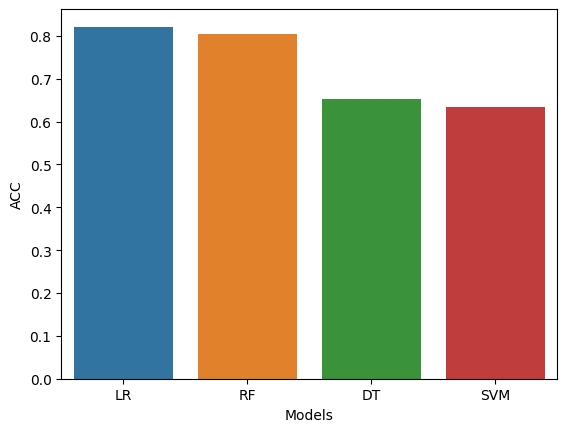

In [49]:
sns.barplot(x='Models',y='ACC',data = final_data)

In [51]:
reg.predict((np.array([[337,
                        118,
                        5,
                        5,
                        4,
                        9.65,
                        1
    
]])))

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.96030925])